In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('../data/raw/NSE-TATAGLOBAL11.csv')
print("Head of the data: ")
display(data.head())
print("Shape:", data.shape) 


Head of the data: 


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Shape: (1235, 8)


In [4]:
print("\nInfo: ")
data.info()


Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [5]:
data = pd.read_csv('../data/raw/NSE-TATAGLOBAL11.csv', parse_dates=['Date'])
data = data.sort_values('Date').reset_index(drop=True)
print(data.head())
data.shape

        Date    Open    High     Low   Last   Close  Total Trade Quantity  \
0 2013-10-08  157.00  157.80  155.20  155.8  155.80             1720413.0   
1 2013-10-09  155.70  158.20  154.15  155.3  155.55             2049580.0   
2 2013-10-10  156.00  160.80  155.85  160.3  160.15             3124853.0   
3 2013-10-11  161.15  163.45  159.00  159.8  160.05             1880046.0   
4 2013-10-14  160.85  161.45  157.70  159.3  159.45             1281419.0   

   Turnover (Lacs)  
0          2688.94  
1          3204.49  
2          4978.80  
3          3030.76  
4          2039.09  


(1235, 8)

In [6]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1235,2016-04-08 15:39:47.368421120,2013-10-08 00:00:00,2015-01-10 12:00:00,2016-04-11 00:00:00,2017-07-10 12:00:00,2018-10-08 00:00:00,NaN
Open,1235.0,168.954858,103.0,137.55,151.5,169.0,327.7,51.499145
High,1235.0,171.429069,104.6,138.925,153.25,172.325,328.75,52.436761
Low,1235.0,166.402308,100.0,135.25,149.5,166.7,321.65,50.542919
Last,1235.0,168.736356,102.6,137.175,151.2,169.1,325.95,51.587384
Close,1235.0,168.731053,102.65,137.225,151.1,169.5,325.75,51.544928
Total Trade Quantity,1235.0,2604151.140081,100180.0,1284481.5,1964885.0,3095788.5,29191015.0,2277027.677173
Turnover (Lacs),1235.0,4843.166502,128.04,1801.035,3068.51,5852.6,55755.08,5348.919832


In [ ]:
#T0 check for any duplicated or missing values
print("Duplicated values: \n",data.duplicated().sum())
print("Mission Values Items: \n", data.isna().sum())
data[data.isna().any(axis=1)]

Duplicated values: 
 0
Mission Values Items: 
 Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)


In [ ]:
data.set_index('Date', inplace=True)
data.index.freq = None 

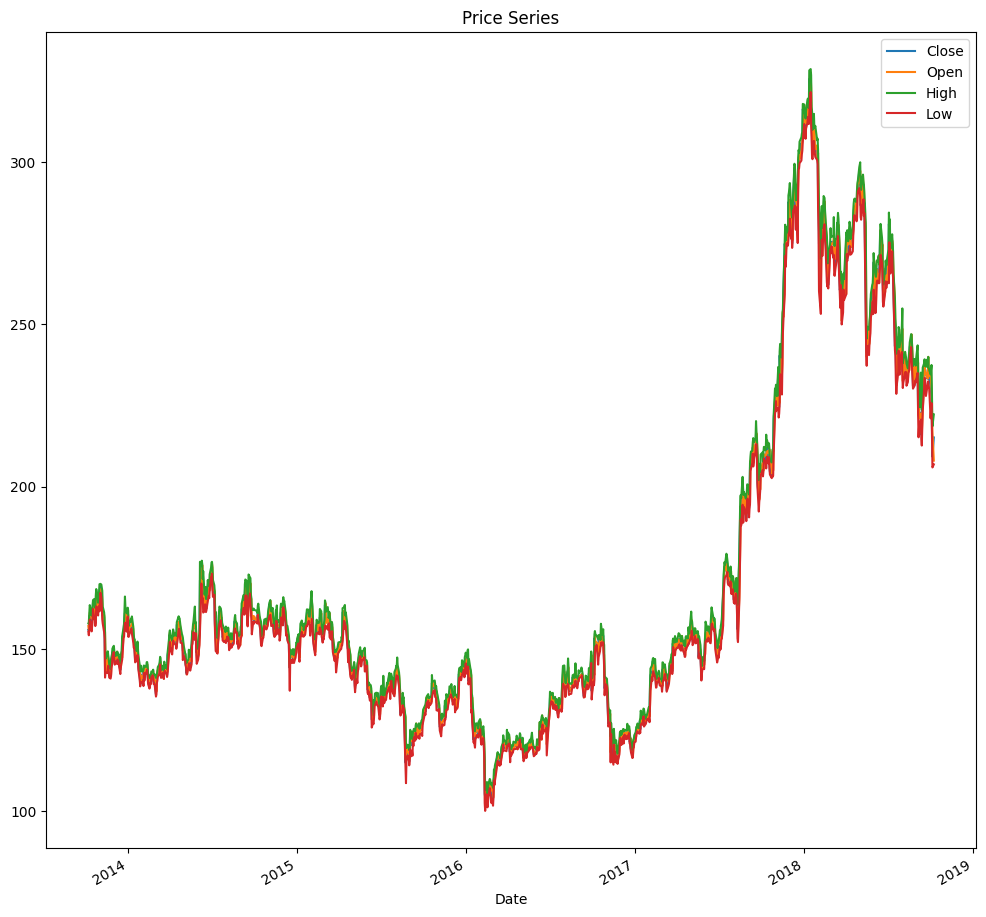

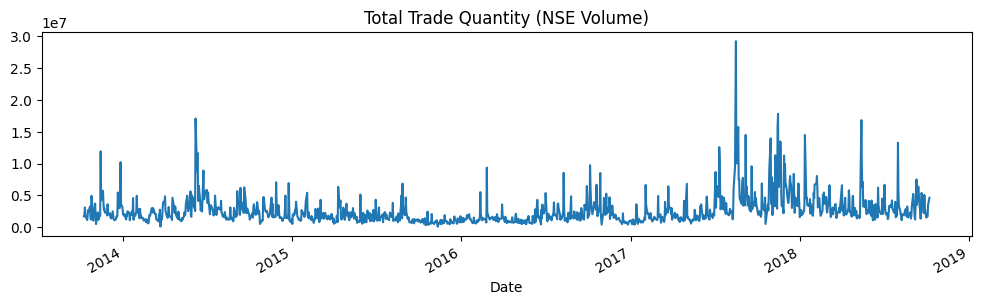

In [ ]:
#Visualizations
data[['Close', 'Open', 'High', 'Low']].plot(figsize=(12,12),title='Price Series')
plt.show()
data['Total Trade Quantity'].plot(figsize=(12,3),title='Total Trade Quantity (NSE Volume)')
plt.show()

In [ ]:
#To handle any mission days because of holidays
rng = pd.date_range(start=data.index.min(),end=data.index.max(),freq='B')
missing_dates = rng.difference(data.index)
print("Missing business dates: \n", missing_dates)
print("Length of missing dates: ", len(missing_dates))

Missing business dates: 
 DatetimeIndex(['2013-10-16', '2013-11-04', '2013-11-15', '2013-12-25',
               '2014-02-27', '2014-03-17', '2014-04-08', '2014-04-14',
               '2014-04-18', '2014-04-24', '2014-05-01', '2014-07-29',
               '2014-08-15', '2014-08-29', '2014-10-02', '2014-10-03',
               '2014-10-06', '2014-10-15', '2014-10-24', '2014-11-04',
               '2014-11-06', '2014-12-25', '2015-01-26', '2015-02-17',
               '2015-03-06', '2015-04-02', '2015-04-03', '2015-04-14',
               '2015-05-01', '2015-09-17', '2015-09-25', '2015-10-02',
               '2015-10-22', '2015-11-12', '2015-11-25', '2015-12-25',
               '2016-01-26', '2016-03-07', '2016-03-24', '2016-03-25',
               '2016-04-14', '2016-04-15', '2016-04-19', '2016-07-06',
               '2016-08-15', '2016-09-05', '2016-09-13', '2016-10-11',
               '2016-10-12', '2016-10-31', '2016-11-14', '2017-01-26',
               '2017-02-24', '2017-03-13', '2017-04

In [ ]:
#Forward fill for prices if its null same for volume fill with 0
data=data.sort_index()
data[['Open','High','Low','Close']] = data[['Open','High','Low','Close']].ffill()
data['Turnover (Lacs)'] = data['Turnover (Lacs)'].fillna(0)


In [12]:
#Returns and LogReturns in stock EDA
data['Returns'] = data['Close'].pct_change()
data['LogReturns'] = np.log(data['Close']).diff()
data[['Returns','LogReturns']].dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
Returns,1234.0,0.000454,0.019608,-0.119248,-0.010571,0.000326,0.011309,0.110678
LogReturns,1234.0,0.000262,0.019636,-0.126980,-0.010627,0.000326,0.011246,0.104971


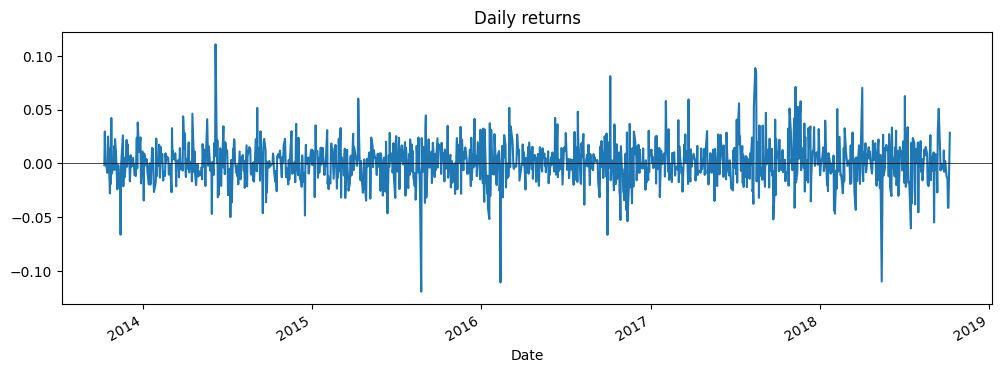

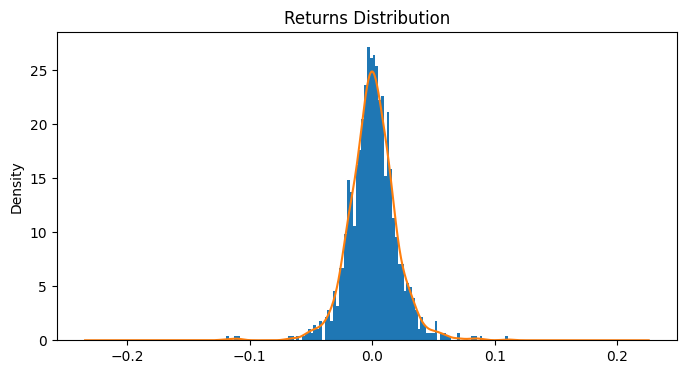

In [13]:
#Visualizations of Returns and LogReturns distribution
data['Returns'].dropna().plot(figsize=(12,4),title='Daily returns')
plt.axhline(0,color='black',lw=0.5)
plt.show()
data['Returns'].dropna().hist(bins=100,figsize=(8,4),density=True)
#The distribution will be centered around zero, confirming that the most frequent daily return is close to zero.
data['Returns'].dropna().plot(kind='kde',title='Returns Distribution')
plt.show()

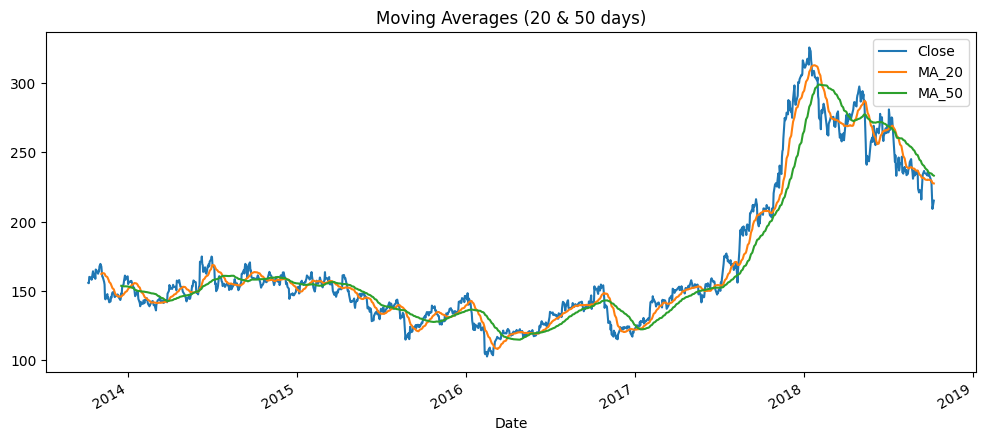

<Axes: title={'center': '20 Days Rolling Volatility'}, xlabel='Date'>

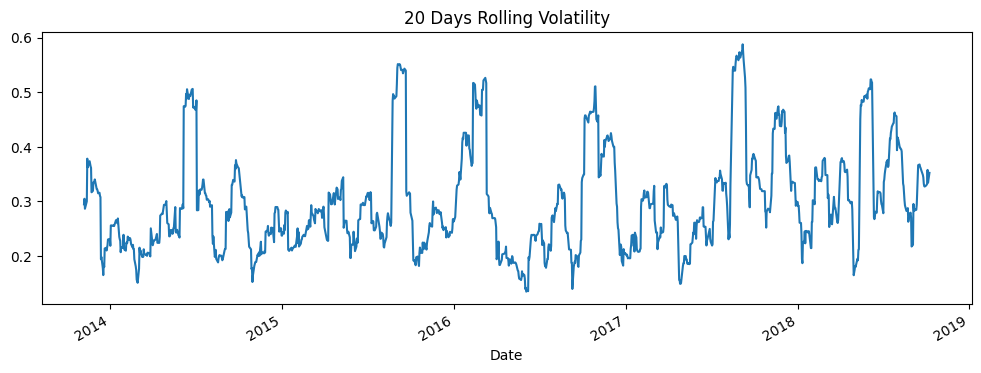

In [ ]:
#Averages of 20 and 50 days moving averages
data['MA_20']=data['Close'].rolling(windows=20).mean()
data['MA_50']=data['Close'].rolling(window=50).mean()
#Volatility tells you how much returns fluctuate. High volatility = higher risk.
data['Vol_20']=data['Returns'].rolling(20).std()*np.sqrt(252) #Annualized Volatility
#visualizing Moving Averages and Volatility
data[['Close','MA_20','MA_50']].plot(figsize=(12,5))
plt.title('Moving Averages (20 & 50 days)')
plt.show()
data['Vol_20'].plot(figsize=(12,4),title='20 Days Rolling Volatility')

######
plot_acf shows how returns are correlated with their past values.
plot_pacf shows the direct correlation with past values after removing intermediate effects. Together, they help you understand whether your return series is random or has structure that can be modeled (AR, MA, ARMA, etc.).


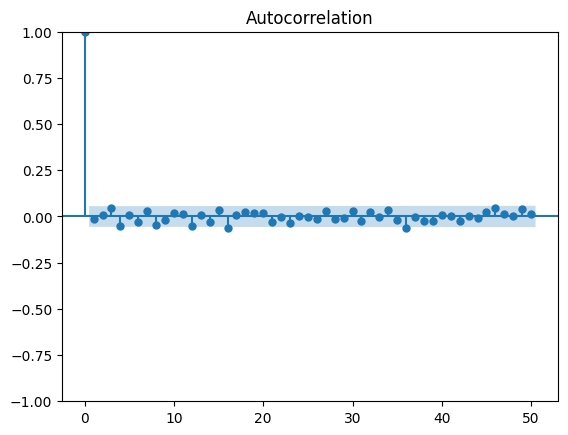

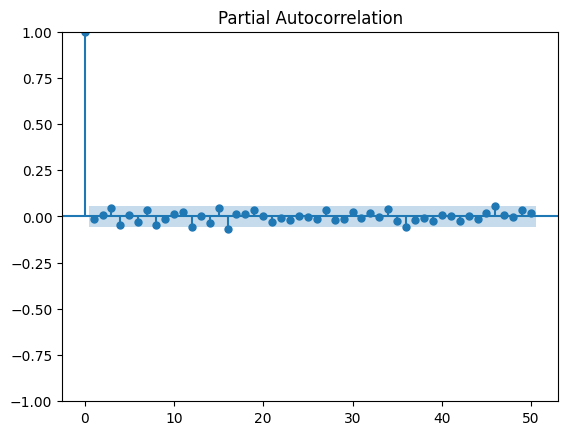

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Returns'].dropna() ,lags=50)
plt.show()
plot_pacf(data['Returns'].dropna() ,lags=50)
plt.show()

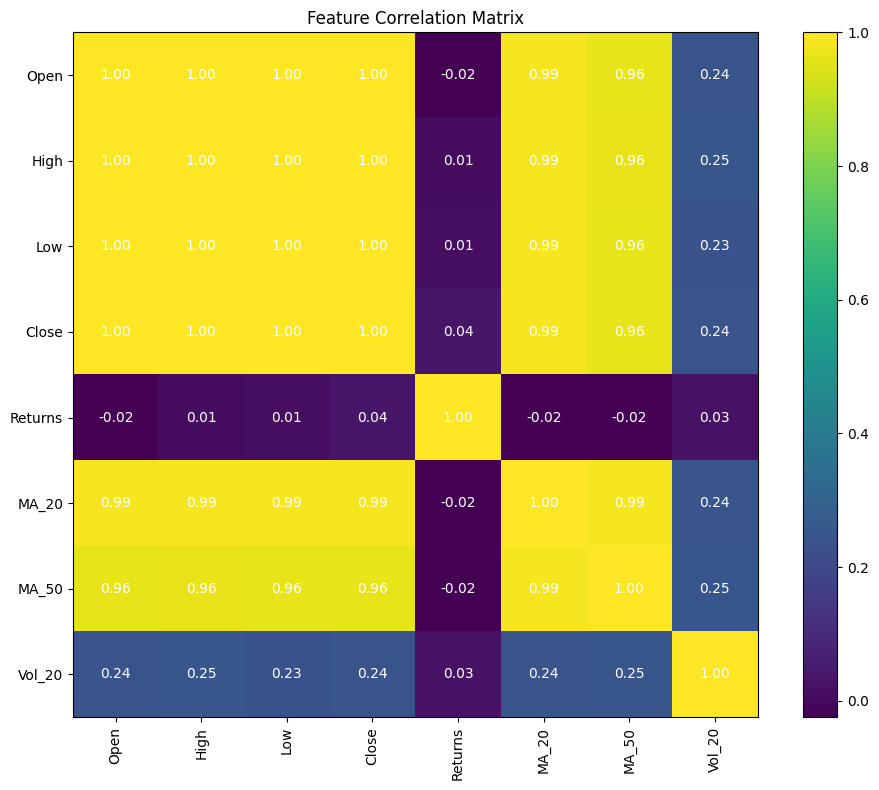

In [21]:
features = data[['Open','High','Low','Close','Returns','MA_20','MA_50','Vol_20']].dropna()
corr=features.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='viridis', interpolation='nearest') 
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)),corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i,j,f"{corr.iloc[i,j]:.2f}",
                     ha='center',va='center',color='white')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [24]:
# Lag features
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)

# Moving averages
data['MA_5']  = data['Close'].rolling(5).mean()
data['MA_10'] = data['Close'].rolling(10).mean()
data['MA_20'] = data['Close'].rolling(20).mean()

# Volatility
data['Vol_5']  = data['Returns'].rolling(5).std()
data['Vol_10'] = data['Returns'].rolling(10).std()
data['Vol_20'] = data['Returns'].rolling(20).std()

# Drop NaNs created by shifting/rolling
data = data.dropna()


In [25]:
X = data[['Open','High','Low','Last','Close',
          'Total Trade Quantity','Turnover (Lacs)',
          'Lag_1','Lag_2','Lag_3',
          'MA_5','MA_10','MA_20',
          'Vol_5','Vol_10','Vol_20']]

y = data['Close']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  
)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
